In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

%matplotlib inline

In [2]:
bus = pd.read_csv('autobuses.csv',encoding = 'iso-8859-1',delimiter = ';')


In [3]:
# Tratamiento de datos de campos fecha
bus.loc[:,'vida'] = 0
bus.loc[bus['Fbaja'] == '31/12/9999', 'Fbaja'] = 'NaN'
bus.loc[bus['Fbaja'] == '31/12/9999', 'vida'] = 'NaN'

bus['Fbaja'] = pd.to_datetime(bus['Fbaja'], dayfirst=True)
bus['Falta'] = pd.to_datetime(bus['Falta'], dayfirst=True)
bus['anobaja'] = bus['Fbaja'].dt.year
bus['anoalta'] = bus['Falta'].dt.year

# Cálculo de vida de buses
bus['vida'] = bus['Fbaja'].sub(bus['Falta'], axis=0)
bus['vida'] = bus['vida'] / np.timedelta64(1, 'D') / 365

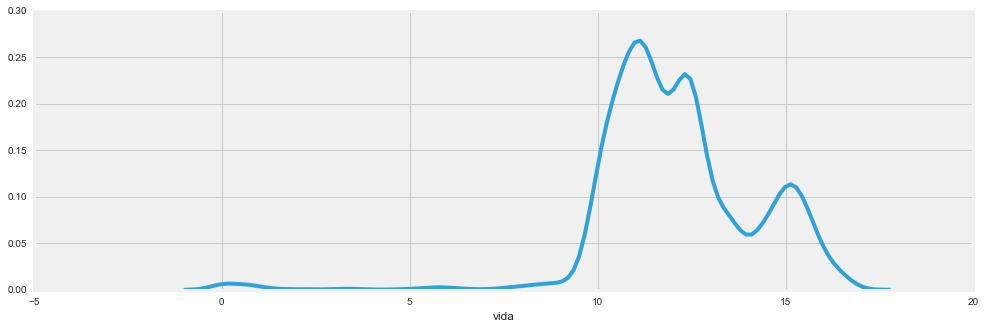

In [4]:
# Distribución de vida de útil de buses
plt.figure(figsize=(15,5))
plot = sns.distplot(bus['vida'], bins=50, color = sns.color_palette()[0], hist=False)

In [5]:
# Análisis de buses con vida de útil inferior a la espera (8 ó más años). Probablementeo sean bajas por siniestros
busraros = bus[bus['vida']<8]


C:\Users\u076515\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


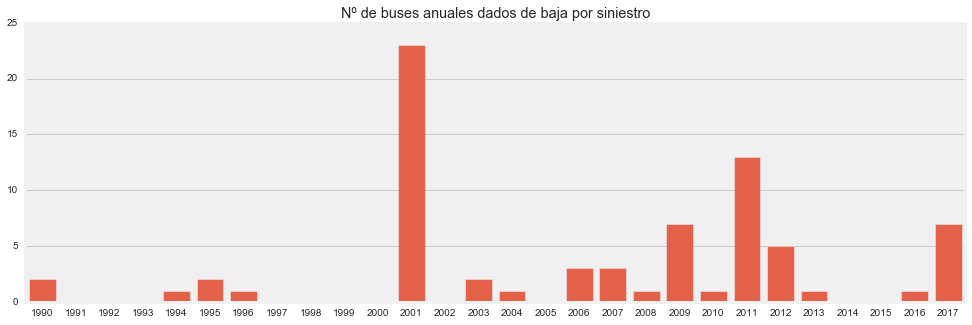

In [6]:
p = busraros.pivot_table( columns='anobaja', values='NumEmt', aggfunc='count',fill_value =0)
anios = np.arange(1990,2018)
accidentes = np.zeros(28)
for year in p.index:
    accidentes[year-1990] = p[year]
plt.figure(figsize=(15,5))
sns.barplot(x=anios, y=accidentes, color = sns.color_palette()[1] )
plt.title('Nº de buses anuales dados de baja por siniestro')

C:\Users\u076515\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


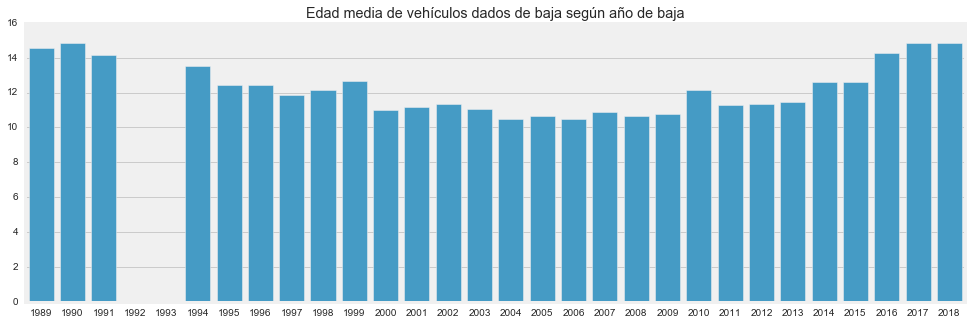

In [7]:
# Análisis de flota que no ha sufrido siniestros

busnormales = bus[bus['vida']>=8]
p = busnormales.pivot_table( columns='anobaja', values='vida', aggfunc=np.mean,fill_value =0)
anios = np.arange(1989,2019)
accidentes = np.zeros(30)
for year in p.index:
    accidentes[year-1989] = p[year]
plt.figure(figsize=(15,5))
sns.barplot(x=anios, y=accidentes, color=sns.color_palette()[0])
plt.title('Edad media de vehículos dados de baja según año de baja')

In [8]:
# Evolución del nº de buses activos por año

anios = np.arange(1970,2019)
activos = pd.DataFrame(np.zeros(len(anios)), index=anios)


for i, row in bus.iterrows():
    yearalta = row['Falta'].year
    yearbaja = row['Fbaja'].year
    if math.isnan(yearbaja): yearbaja = 2018
    for year in range(yearalta,yearbaja+1):
        activos.loc[year] += 1


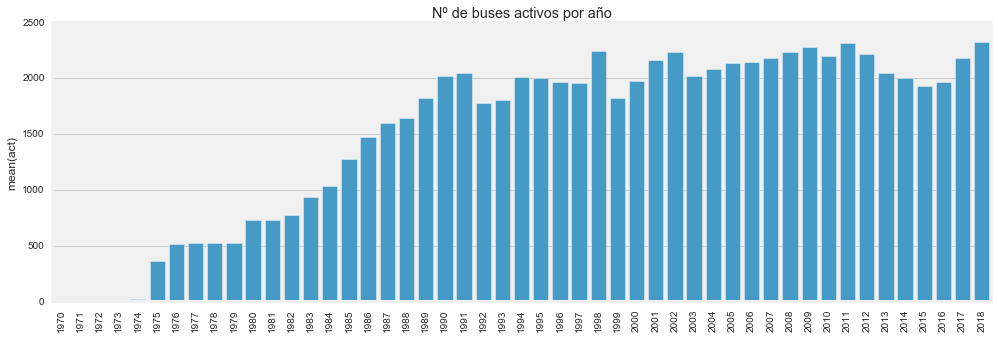

In [10]:
activos.columns = ['act']

plt.figure(figsize=(15,5))
g = sns.barplot(x=anios, y=activos['act'], color=sns.color_palette()[0])
plt.setp(g.get_xticklabels(), rotation=90);

plt.title('Nº de buses activos por año')

In [11]:
# Evolución del nº de buses activos por año. Zoom en tipo de combustible 

anios = np.arange(1970,2019)
cols = bus['Combustible'].unique()
activos = pd.DataFrame(np.zeros((len(anios),len(cols))),columns=cols, index=anios)

for i, row in bus.iterrows():
    yearalta = row['Falta'].year
    yearbaja = row['Fbaja'].year
    if math.isnan(yearbaja): yearbaja = 2018
    for year in range(yearalta,yearbaja+1):
        comb= row['Combustible']
        activos[comb].loc[year] += 1




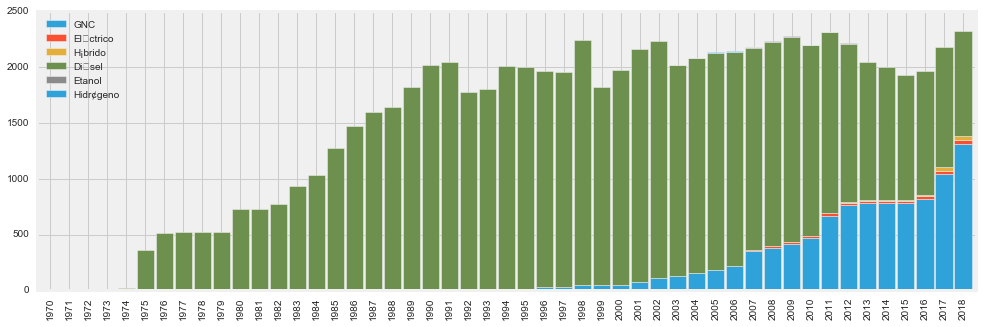

In [12]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
activos.plot(kind="bar", stacked=True,width= 0.9)
plt.show()

In [13]:
# Evolución del nº de buses activos por año. Gas Natural y Diesel frente a resto
activos['resto'] = activos[cols[1]] + activos[cols[2]] + activos[cols[4]] + activos[cols[5]]
activosorg = activos.filter([cols[3],cols[0], 'resto'], axis=1)


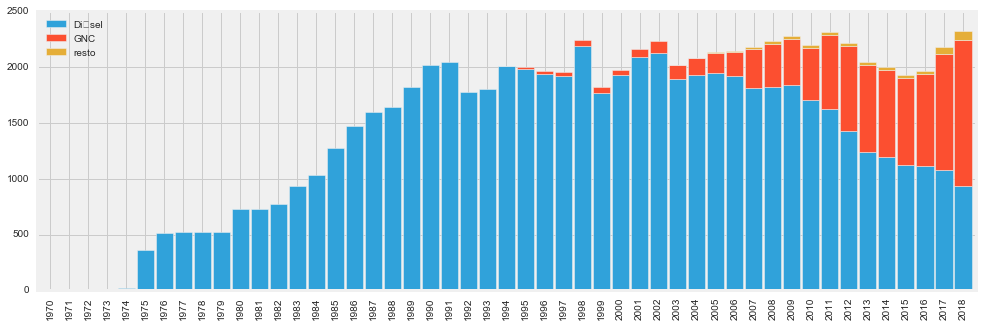

In [14]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
activosorg.plot(kind="bar", stacked=True,width= 0.9)
plt.show()

In [15]:
# Comparación del altas y bajas anuales de buses
bajas = bus.pivot_table( columns='anobaja', values='NumEmt', aggfunc='count',fill_value =0)
altas = bus.pivot_table( columns='anoalta', values='NumEmt', aggfunc='count',fill_value =0)
anios = np.arange(1974,2019)
busesaltas = np.zeros(len(anios))
busesbajas = np.zeros(len(anios))  

for year in bajas.index:
    busesbajas[year-1974] = bajas[year]
for year in altas.index:
    busesaltas[year-1974] = altas[year] 


C:\Users\u076515\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


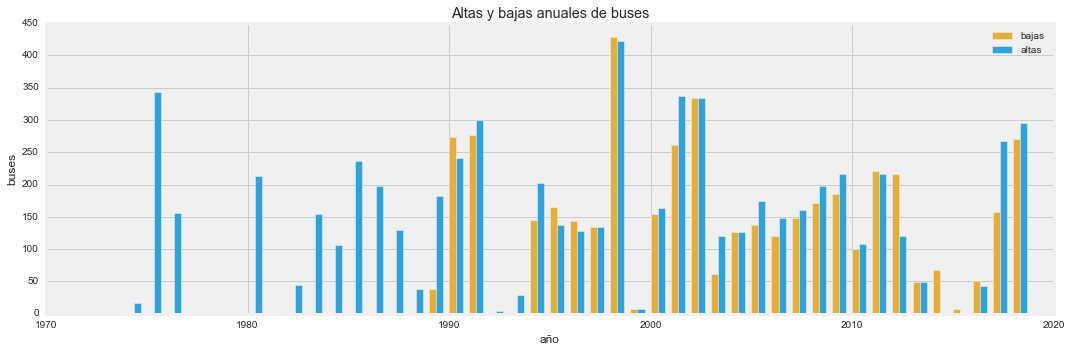

In [16]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
fig, ax = plt.subplots()
width = 0.35
rects1 = plt.bar(anios, busesbajas, width, color = sns.color_palette()[2], label='bajas')
rects2 = plt.bar(anios+width, busesaltas, width, color = sns.color_palette()[0], label='altas')
 
plt.xlabel('año')
plt.ylabel('buses')
plt.title('Altas y bajas anuales de buses')
#plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()